In [8]:
# Import, read, and split data
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data = pd.read_csv('learningCurve.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

### Parameters of learning curve
**estimator**, is the actual classifier we're using for the data, e.g., LogisticRegression() or GradientBoostingClassifier().<br>
__X and y__ is our data, split into features and labels.<br>
**train_sizes** are the sizes of the chunks of data used to draw each point in the curve.<br>
**train_scores** are the training scores for the algorithm trained on each chunk of data.<br>
**test_scores** are the testing scores for the algorithm trained on each chunk of data.

In [6]:
from sklearn.model_selection import learning_curve


def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

### Score - higher is better
If y-axis is error instead of score. lower is better and below graph will be filpped vertically.

#### Under fitting

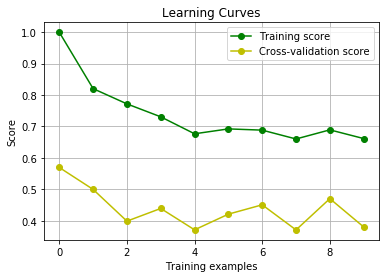

In [15]:
### Logistic Regression
estimator = LogisticRegression()
draw_learning_curves(X, y, estimator, 10)

#### Just Right

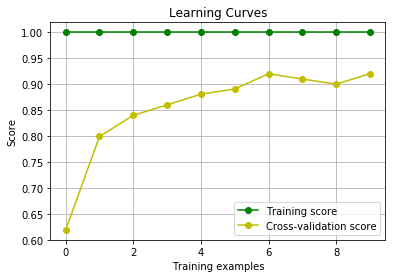

In [17]:
### Decision Tree
estimator = DecisionTreeClassifier()
draw_learning_curves(X, y, estimator, 10)

#### Better than Just Right

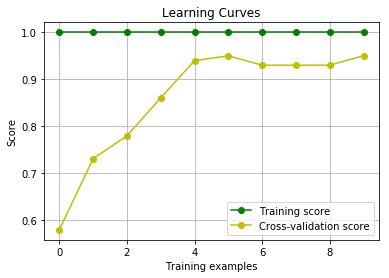

In [18]:
### Gradient Boosting
estimator = GradientBoostingClassifier()
draw_learning_curves(X, y, estimator, 10)

#### Overfitting

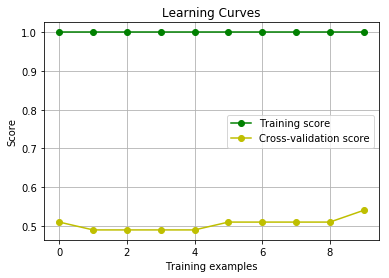

In [19]:
### Support Vector Machine
estimator = SVC(kernel='rbf', gamma=1000)
draw_learning_curves(X, y, estimator, 10)